# 확률 모형이란

## 데이터 분포 묘사의 문제점

기술 통계 등의 방법으로 자료의 분포를 기술하는 방법은 불확실하며 대략적인 정보만을 전달할 뿐이며 자세한 혹은 완벽한 정보를 전달하기 어렵다.

예를 들어 다음과 같이 1,000개의 데이터가 있다. 데이터 생성에는 SciPy의 확률 분포 명령을 이용하였다.

[[school_notebook:175522b819ae4645907179462dabc5d4]]

In [2]:
sp.random.seed(0)
x = sp.random.normal(size=1000)

히스토그램을 그리면 다음과 같다.

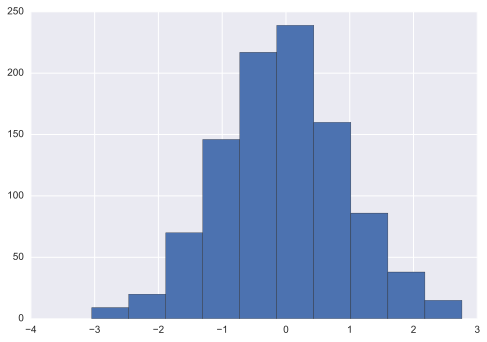

In [3]:
ns, bins, ps = plt.hist(x, bins=10)
plt.show()

In [4]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,10
0,-3.046143,-2.465593,-1.885043,-1.304494,-0.723944,-0.143394,0.437156,1.017706,1.598255,2.178805,2.759355
1,0.009000,0.020000,0.070000,0.146000,0.217000,0.239000,0.160000,0.086000,0.038000,0.015000,NaN


이 히스토그램에서 -0.143394	부터 0.437156 사이의 값이 전체의 약 24%를 차지하고 있음을 알 수 있다. 그럼 만약 -0.01	부터 0.01 사이의 구간에 대한 정보를 얻고 싶다면? 더 세부적인 구간에 대해 정보를 구하고 싶다면 히스토그램의 구간을 더 작게 나누어야 한다.

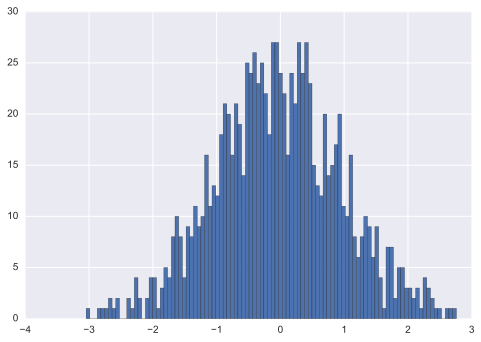

In [5]:
ns, bins, ps = plt.hist(x, bins=100)
plt.show()

In [6]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-3.046143,-2.988088,-2.930033,-2.871978,-2.813923,-2.755868,-2.697813,-2.639758,-2.581703,-2.523648,...,2.23686,2.294915,2.35297,2.411025,2.46908,2.527135,2.58519,2.643245,2.7013,2.759355
1,0.001000,0.000000,0.000000,0.001000,0.001000,0.001000,0.002000,0.001000,0.002000,0.000000,...,0.00400,0.003000,0.00200,0.001000,0.00100,0.000000,0.00100,0.001000,0.0010,NaN


정확한 묘사를 위해 구간의 수를 증가시키면 몇 가지 문제가 발생한다.

우선 구간의 간격이 작아지면서 하나의 구간에 있는 자료의 수가 점점 적어진다. 만약 구간 수가 무한대에 가깝다면 하나의 구간 폭은 0으로 수렴하고 해당 구간의 자료 수도 0으로 수렴할 것이다. 따라서 분포의 상대적인 모양을 살펴보기 힘들어진다. 

더 큰 문제는 분포를 묘사하기 위한 정보가 증가한다는 점이다. 데이터의 분포를 묘사하는 이유는 적은 갯수의 숫자를 통해 데이터의 전반적인 모습을 빠르게 파악하기 위한 것인데 묘사를 위한 정보의 양이 증가하면 원래의 목적을 잃어버린다.

## 확률 모형

이러한 문제를 해결하기 위해 만들어진 것이 **확률 모형**(probability model)이다. 확률 모형은 추후 설명할 확률 변수(random variable)라는 것을 이용하여 데이터 분포를 수학적으로 정의하는 방법을 말한다.

보통 **확률 분포 함수**(probability distribution function) 또는 **확률 밀도 함수**(probability density function)라고 불리우는 미리 정해진 함수의 수식을 사용한다. 이 때 이 함수들의 계수를 분포의 **모수**(parameter)라고 부른다.

예를 들어 가장 널리 쓰이는 확률 모형의 하나인 가우시안 정규 분포(Gaussian normal distribution)는 다음과 같은 수식으로 확률 밀도 함수를 정의한다.

$$ N(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

이 함수의 독립 변수는 자료의 값을 의미하는 변수 $x$이다. 식에서 사용된 문자 $\mu$와 $\sigma$는 평균(mean)과 표준편차(standard deviation)를 뜻하는 모수이다. 함수 표기에서 세미콜론(;)은 독립 변수와 모수를 구분하기 위해 사용하였다.

이 함수식이 실제 분포와 어떤 관계를 가지는지는 분포 함수에 대한 다음 노트북을 참조한다.

[[school_notebook:4d74d1b5651245a7903583f30ae44608]]

다음 그림은 scipy를 사용하여 평균 0, 표준편차 1인 표준 정규 분포(standard normal distribution)의 모양을 그린것이다.

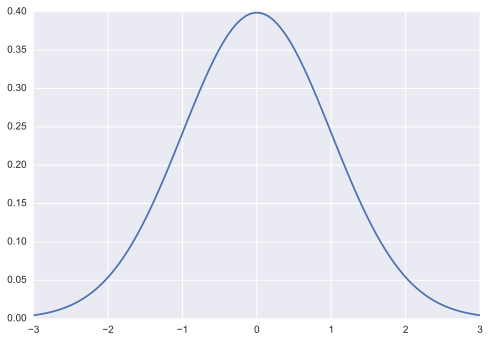

In [7]:
x = np.linspace(-3, 3, 100)
y = sp.stats.norm.pdf(x)
plt.plot(x, y)
plt.show()

예를 들어 어떤 데이터의 분포를 묘사하기 위해 데이터의 히스토그램을 그리거나 기술 통계 수치를 제시할 필요없이 다음과 같이 말하는 것 만으로 데이터의 분포에 대한 정보를 **완벽하게** 전달할 수 있다.

> 이 데이터는 평균 $\mu$, 표준편차 $\sigma$인 가우시안 정규 분포를 따른다.

## 확률 모형과 데이터 생성

확률 모형론은 데이터와 확률간의 관계를 이용하여 데이터 분포를 효율적으로 묘사하는 방법을 말한다. 데이터와 확률간의 관계를 알기 위해서는 우선 데이터가 어떻게 만들어지는지를 이해해야 한다.

우리는 보통 조사(research) 과정을 통해 데이터를 하나 하나 수집한다. 이러한 과정은 주사위를 던지는 행위에 비유할 수 있다. 즉 조사를 통해 데이터를 하나 확보하는 일은 주사위를 던져 위를 향하는 눈금의 숫자를 종이에 적는 일과 같다고 보는 것이다.

예를 들어 다음 데이터를 보자.

In [17]:
x = np.array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3, 5, 1, 1, 5, 3, 2, 1, 2, 6, 2, 6, 1, 2,
              5, 4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5, 4, 4,
              3, 5, 3, 1, 1, 5, 6, 6, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 2, 2, 4, 4, 3,
              4, 1, 4, 6, 5, 2, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 1, 5, 4, 3, 6, 6, 6])

이 데이터는 사실 진짜로 컴퓨터 주사위를 던져 만든 숫자이다. 이 숫자를 만드는 코드는 아래와 같다.

In [19]:
np.random.seed(0)
np.random.randint(1, 7, 92)

array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3, 5, 1, 1, 5, 3, 2, 1, 2, 6, 2, 6, 1, 2,
       5, 4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5, 4, 4,
       3, 5, 3, 1, 1, 5, 6, 6, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 2, 2, 4, 4, 3,
       4, 1, 4, 6, 5, 2, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 1, 5, 4, 3, 6, 6, 6])

**확률 모형론을 사용한다는 것은 데이터를 생성하는 가상의 주사위가 있다고 가정하는 것과 같다.** 우리가 해야 할 일은 우리가 현재 가지고 있는 데이터와 똑같은 분포의 데이터를 만들어내는 가상의 주사위를 찾고 그 주사위를 실제로 만드는 것이다. 여기서 주의할 점은 동일한 데이터 값 하나 하나를 만들어 내는 주사위가 아니라 동일한 데이터 **분포**를 만들어내는 주사위라는 점이다.

일단 이러한 주사위를 손에 넣으면 기존에 확보한 데이터가 없어진다고 해도 큰 문제가 없다. 왜일까? 주사위를 다시 던지면 새로운 데이터를 얻을 수 있기 때문이다. 물론 이 새로운 데이터는 옛날 데이터와 값이 하나 하나 일치하지는 않는다. 하지만 옛날 데이터의 분포 특성과 새로운 데이터의 분포 특성은 같다. 그렇게 되도록 주사위를 만들어 냈기 때문이다. 

## 확률 변수

이렇게 예측할 수는 없지만 특정한 분포 특성을 가지는 데이터를 만들어 내는 일종의 기계(machine)를 수학에서는 **확률 변수**(random variable)라고 한다. 

확률 변수는 내부적으로 확률 공간(probability space)을 가지고 있다. 확률 공간의 정의에 대해서는 기초 확률론 부분을 참조한다.

[[school_notebook:9341c66303174eea9d35b2e4b6981ed9]]

확률 공간은 어떤 분포 특성을 가지는 표본(샘플, sample)을 만드는 기계이고 확률 변수는 이렇게 만들어진 표본을 숫자로 바꾸는 기계라고 생각하면 이해하기 쉽다. 확률 분포 함수(probability distribution function) 또는 확률 밀도 함수(probability density function)와 같은 확률 모형은 확률 변수를 수학적으로 정의하기 위한 도구이다.

## 샘플링

우리가 가진 데이터가 확률 변수라고 하는 가상의 주사위에 의해 생성된 것이라고 할 때, 이 주사위를 던져서 데이터를 생성하는 과정을 **샘플링**(sampling)이라고 한다. 또한 샘플링을 통해 얻어진 데이터를 **표본**(샘플, sample)이라고 한다. 

통계학에서 샘플링은 다른 의미로도 사용되는데 많은 수의 데이터 집합에서 일부 데이터만 선택하는 과정을 샘플링이라고도 한다. 

## 데이터 분석의 과정

우리가 하게되는 대부분의 데이터 분석은 다음과 같은 과정을 거친다.


1. 자료를 확보한다.
2. 확보된 자료를 확률 변수의 표본으로 가정한다.
3. 확률 변수가 특정한 확률 모형을 따른다고 가정한다.
4. 표본에 대한 정보로부터 확률 모형의 종류나 모수를 추정한다.
5. 구해진 확률 모형으로부터 다음에 생성될 데이터나 데이터 특성을 예측한다.